# Shubhi Srivastava


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
b=pd.read_csv("Boston.ns.csv")

In [3]:
b

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
b=b.dropna(axis=0,how='any')

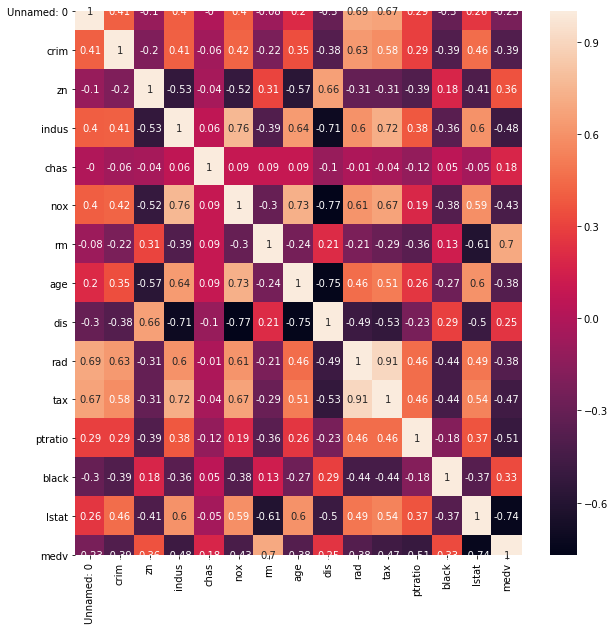

In [5]:
plt.figure(figsize=(10,10))
correlation_matrix=b.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [6]:
X = pd.DataFrame(np.c_[b['lstat'], b['rm'],b['dis'],b['zn'],b['chas'],b['black']])
Y = b['medv']

In [7]:
X

,0,1,2,3,4,5
0,4.98,6.575,4.0900,18.0,0.0,396.90
1,9.14,6.421,4.9671,0.0,0.0,396.90
2,4.03,7.185,4.9671,0.0,0.0,392.83
3,2.94,6.998,6.0622,0.0,0.0,394.63
4,5.33,7.147,6.0622,0.0,0.0,396.90
...,...,...,...,...,...,...
501,9.67,6.593,2.4786,0.0,0.0,391.99
502,9.08,6.120,2.2875,0.0,0.0,396.90
503,5.64,6.976,2.1675,0.0,0.0,396.90
504,6.48,6.794,2.3889,0.0,0.0,393.45


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [10]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=0.01)
ridgeR.fit(X_train,Y_train)
y_pred=ridgeR.predict(X_test)
y_pred

array([30.78058832, 29.63372831, 15.0778138 , 21.918135  , 21.51880291,
       24.71608392, 33.47798824, 20.39000078, 20.81349178, 25.80713344,
       27.62820642, 31.28269251, 20.16106636, 24.99560683, 22.57449857,
       21.40159697, 18.27846892, 37.8074957 , 28.84712997,  7.44166733,
       20.42300773, 16.37716294, 25.63877203, 26.13605456, 30.74781545,
       10.01292291, 14.49596236, 18.33887888, 33.53697307, 14.95067748,
       25.69637347, 13.07912248, 41.27987976, 20.79211086, 21.65296772,
       21.36005424, 19.56133615, 28.29152968,  8.54922252, 20.01515783,
       24.27840288, 23.57288987, 27.30171037, 14.28829734, 19.38298319,
       15.35448604, 39.65671003, 19.90424421, 22.94237221, 21.27941549,
       26.42959922, 22.22118901, 25.51475635, 23.74052388,  6.83528151,
       25.36837365, 10.15666364, 27.0384064 , 18.99792204, 35.63436482,
       21.92103555, 26.92198372, 17.03417603, 17.07750195,  6.8582504 ,
       30.87917758, 36.89283237, 23.38089496, 20.90192317, 22.33

In [11]:
ridge_coe= pd.DataFrame()
ridge_coe["Columns"]= X_train.columns
ridge_coe['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coe)

   Columns  Coefficient Estimate
0        0             -0.676682
1        1              3.942526
2        2             -0.943280
3        3              0.073832
4        4              2.763716
5        5              0.011217


In [12]:
mse_ridge=np.mean((y_pred - Y_test)**2)
print("mse=", mse_ridge)


mse= 26.861003003050214


In [13]:
rmse_ridge=np.sqrt(np.mean((y_pred-Y_test)**2))
print("rmse=", rmse_ridge)

rmse= 5.182760172248974


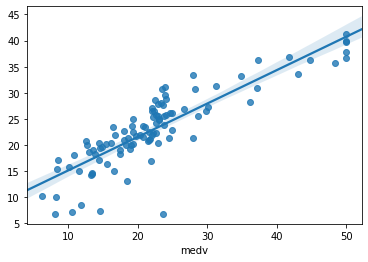

In [14]:
sns.regplot(Y_test,y_pred,order=1)

In [15]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
y_pred1=lasso.predict(X_test)
y_pred1

array([30.78394551, 29.64114416, 15.08471102, 21.94620535, 21.55763822,
       24.72676711, 33.4908419 , 20.4053374 , 20.69184327, 25.82031914,
       27.63434257, 31.2895732 , 20.1845292 , 25.02152325, 22.59333086,
       21.4309807 , 18.26224065, 37.76673536, 28.86774258,  7.46049458,
       20.45048859, 16.39905832, 25.64719153, 26.15353714, 30.76955797,
       10.01553397, 14.49913638, 18.35951103, 33.52340047, 14.97139178,
       25.70922675, 13.09725883, 41.25849609, 20.7973153 , 21.67273301,
       21.37842827, 19.56216247, 28.290912  ,  8.5989726 , 20.02623446,
       24.29607526, 23.59199577, 27.31154664, 14.28358569, 19.3873603 ,
       15.33524299, 39.51245865, 19.91919484, 22.9627099 , 21.29081413,
       26.42339869, 22.23127642, 25.53322927, 23.75288344,  6.84962682,
       25.3831967 , 10.15051613, 27.06399788, 19.01273018, 35.60725329,
       21.92454641, 26.93316849, 17.04701863, 17.07899786,  6.86418745,
       30.88368393, 36.86572912, 23.39085934, 20.92306554, 22.36

In [16]:
lasso_coe = pd.DataFrame()
lasso_coe["Columns"] = X_train.columns
lasso_coe['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coe)

   Columns  Coefficient Estimate
0        0             -0.678311
1        1              3.916183
2        2             -0.943358
3        3              0.073816
4        4              2.631447
5        5              0.011215


In [17]:
mse_lasso = np.mean((y_pred1 - Y_test)**2)
print("mse=", mse_lasso)



mse= 26.98526268646284


In [18]:
rmse_lasso=np.sqrt(np.mean((y_pred1-Y_test)**2))
print("rmse=", rmse_lasso)

rmse= 5.19473413048857


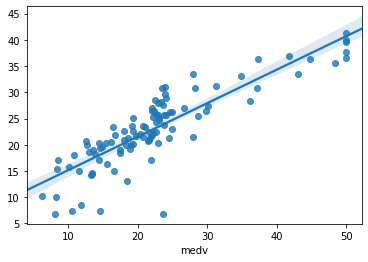

In [19]:
sns.regplot(Y_test,y_pred1,order=1)